# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [268]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train_org, y_train_org), (x_test_org, y_test_org) = cifar100.load_data(label_mode='fine')

In [216]:
import numpy as np

print("Shape of x_train: ", x_train_org.shape)
print("Shape of y_train: ", y_train_org.shape)
print("Unique values of y_train: ", np.unique(y_train_org))


Shape of x_train:  (50000, 32, 32, 3)
Shape of y_train:  (50000, 1)
Unique values of y_train:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [217]:
import matplotlib.pyplot as plt

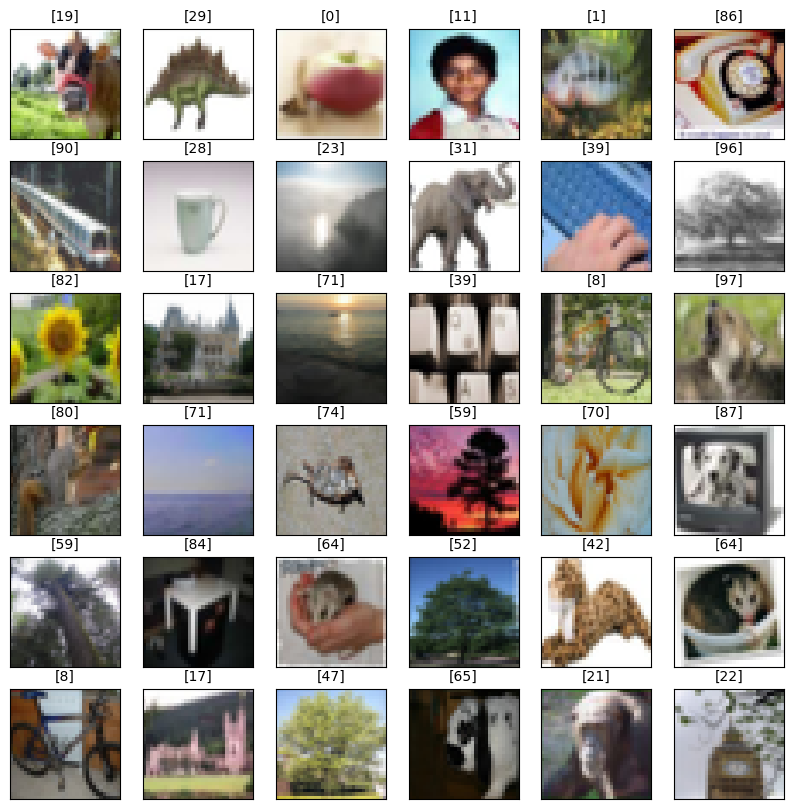

In [218]:
# Create a new figure
plt.figure(figsize=(10,10))

for i in range(36):
    # Create a subplot for each image
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(x_train[i])

    # Set the label as the title
    plt.title([y_train[i][0]], fontsize=10)

# Display the figure
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [219]:
x_train = x_train_org.astype('float32')
x_test = x_test_org.astype('float32')

x_train_min = x_train_org.min(axis=(0, 1, 2), keepdims=True)
x_train_max = x_train_org.max(axis=(0, 1, 2), keepdims=True)

x_train_normalized = (x_train - x_train_min) / (x_train_max - x_train_min)
print("x_train_normalized shape:", x_train_normalized.shape)

x_test_normalized = (x_test - x_train_min) / (x_train_max - x_train_min)
print("x_test_normalized shape:", x_test_normalized.shape)

x_train_normalized shape: (50000, 32, 32, 3)
x_test_normalized shape: (10000, 32, 32, 3)


In [220]:
# Did not one-hot encode my labels since they are already in integer form. And my loss function for the model will be 
# sparse_categorical_crossentropy which is used exactly for this scenario.

In [221]:
#x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.2)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [222]:
def my_kernel(shape=(5, 5, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[:, :, 0, 0] = 1 / 25
    array[:, :, 1, 1] = 1 / 25
    array[:, :, 2, 2] = 1 / 25
    return array

In [223]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import layers, models


model = models.Sequential(name="CNN_model")

# Convolutional layers
model.add(layers.Conv2D(filters=3, activation='relu', kernel_size=(5, 5), padding="same",
           input_shape=(32, 32, 3), kernel_initializer=my_kernel))

model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

# Flatten layer to transition from convolutional to dense layers
model.add(layers.Flatten())

# Dense (fully connected) layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))  # Output layer with 100 classes


### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> sparse_categorical_crossentropy - #Used when labels are integers and not one-hot encoded vectors
- <b>Optimizer:</b> accuracy - basic metric that shows percentage of correct predictions out of the total predictions

In [224]:
from tensorflow.keras.metrics import Recall

In [225]:
from keras import optimizers

# Compile the model with suitable loss function and optimizer
optimizer = optimizers.Adam(learning_rate=0.0001)  # Use Adam optimizer
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 3)         228       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 16, 16, 3)         0         
 ng2D)                                                           
                                                                 
 flatten_22 (Flatten)        (None, 768)               0         
                                                                 
 dense_46 (Dense)            (None, 128)               98432     
                                                                 
 dense_47 (Dense)            (None, 100)               12900     
                                                                 
Total params: 111560 (435.78 KB)
Trainable params: 111560 (435.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [226]:
# Fit the CNN model on the training set
history = model.fit(x_train_normalized, y_train,
                    epochs=10,  
                    batch_size=32,  
                    validation_split=0.2)  # Use 20% of training data as validation



Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 4.3920 - accuracy: 0.0439 - val_loss: 4.1470 - val_accuracy: 0.0721
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 4.0317 - accuracy: 0.0898 - val_loss: 3.9896 - val_accuracy: 0.0926
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 3.8984 - accuracy: 0.1114 - val_loss: 3.8807 - val_accuracy: 0.1178
Epoch 4/10
1250/1250 [==============================] - 4s 4ms/step - loss: 3.8022 - accuracy: 0.1310 - val_loss: 3.8086 - val_accuracy: 0.1276
Epoch 5/10
1250/1250 [==============================] - 4s 4ms/step - loss: 3.7292 - accuracy: 0.1447 - val_loss: 3.7397 - val_accuracy: 0.1431
Epoch 6/10
1250/1250 [==============================] - 4s 4ms/step - loss: 3.6697 - accuracy: 0.1539 - val_loss: 3.6898 - val_accuracy: 0.1454
Epoch 7/10
1250/1250 [==============================] - 4s 4ms/step - loss: 3.6228 - accuracy: 0.1642 - val_loss: 3.6560 - val_accuracy:

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 0.1851
- <b>Other metric:</b> Top-k Accuracy
- <b>Reason for selection:</b> Measures the percentage of instances where the true label is among the top-k predicted probabilities
- <b>Value of metric:</b> 0.0539
- <b>Interpretation of metric value:</b> Means that the true label for a sample is among the top-k predicted classes for 5.39% of the total samples

In [227]:
# Evaluate the CNN model on the test set
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 3.5894 - accuracy: 0.1751
Test Loss: 3.589423894882202
Test Accuracy: 0.17509999871253967


In [228]:
print(model.metrics_names)

['loss', 'accuracy']


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

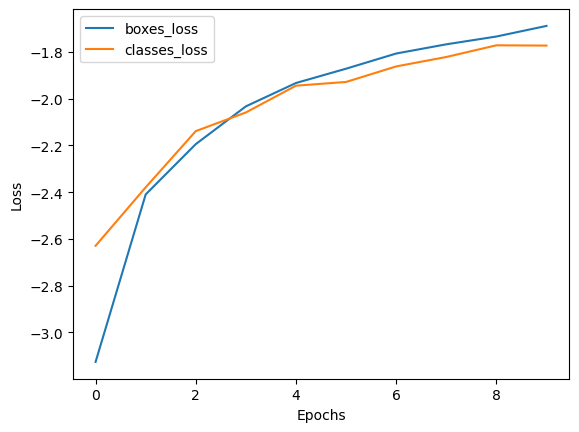

In [229]:
import matplotlib.pyplot as plt
plt.plot(np.log(history.history["accuracy"]), label="boxes_loss")
plt.plot(np.log(history.history["val_accuracy"]), label="classes_loss")
plt.legend(loc="upper left")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [232]:
# Use pre-trained model ResNet50
# Preprocess input images using ResNet50 preprocessing
x_train = tf.keras.applications.resnet50.preprocess_input(x_train)
x_test = tf.keras.applications.resnet50.preprocess_input(x_test)

In [233]:
from sklearn.model_selection import train_test_split

# Split data to train , test, and val subsets
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.1)

In [234]:
from keras.utils import to_categorical

#One hot encode labels

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [235]:

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((45000, 32, 32, 3), (45000, 100))
((5000, 32, 32, 3), (5000, 100))
((10000, 32, 32, 3), (10000, 100))


In [236]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data Augmentation Function
train_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1,)

val_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1,)

test_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1,) 

In [237]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50  # Import ResNet50 model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout, BatchNormalization, UpSampling2D
from tensorflow.keras.models import Model

inputs = tf.keras.layers.Input(shape=(32, 32, 3))

# Input size for Resnet50 is 224 x 224.
# Resize cifar100 data to match the size expected by ResNet50
resized_inputs = UpSampling2D(size=(7, 7))(inputs)

In [254]:
# Load the ResNet50 model with pretrained weights
resnet_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=resized_inputs  # Use resized input as input tensor
)

# Freeze all layers initially
for layer in resnet_model.layers:
    layer.trainable = False

# Unfreeze the last X layers of the ResNet50 model
NUM_LAYERS_TO_UNFREEZE = 30
for layer in resnet_model.layers[-NUM_LAYERS_TO_UNFREEZE:]:
    layer.trainable = True

# Global average pooling and classification layers
x = GlobalAveragePooling2D()(resnet_model.output)
x = Dense(256, activation="relu")(x)
x = BatchNormalization()(x)  
x = Dropout(0.2)(x)  
classification_output = Dense(100, activation="softmax", name="classification")(x)

# Connect the feature extraction and "classifier" layers to build the model
ResNet_model = Model(inputs=inputs, outputs=classification_output, name="ResNet")

# Compile the model
optimizer = tf.keras.optimizers.Adam()  # Use Adam optimizer


#Specify the loss as categorical_crossentropy since the labels are 1 hot encoded. 
ResNet_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ResNet_model.summary()

Model: "ResNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 up_sampling2d_5 (UpSamplin  (None, 224, 224, 3)          0         ['input_8[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['up_sampling2d_5[0][0]']     
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']      

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [273]:
# Get only subset of data to quicken training as using the whole dataset takes hours
idx = np.arange(len(x_train))


subset_x_train = x_train[:int(.01*len(idx))]
subset_y_train = y_train[:int(.01*len(idx))]

subset_x_val = x_val[:int(.01*len(idx))]
subset_y_val = y_val[:int(.01*len(idx))]

subset_x_test = x_test[:int(.01*len(idx))]
subset_y_test = y_test[:int(.01*len(idx))]


print((subset_x_train.shape,subset_y_train.shape))
print((subset_x_val.shape,subset_y_val.shape))
print((subset_x_test.shape,subset_y_test.shape))

((450, 32, 32, 3), (450, 100))
((450, 32, 32, 3), (450, 100))
((450, 32, 32, 3), (450, 100))


In [274]:

batch_size=64
epochs=15

history = ResNet_model.fit(train_generator.flow(subset_x_train,subset_y_train,batch_size=batch_size),
                                     epochs=epochs,
                                     steps_per_epoch=subset_x_train.shape[0]//batch_size,
                                     validation_data=val_generator.flow(subset_x_val,subset_y_val,batch_size=batch_size),
                                     shuffle = True
                                    )




Epoch 1/15
7/7 [==============================] - 26s 4s/step - loss: 0.3781 - accuracy: 0.9689 - val_loss: 4.0895 - val_accuracy: 0.1800
Epoch 2/15
7/7 [==============================] - 26s 4s/step - loss: 0.4016 - accuracy: 0.9663 - val_loss: 4.0387 - val_accuracy: 0.1667
Epoch 3/15
7/7 [==============================] - 26s 4s/step - loss: 0.3537 - accuracy: 0.9741 - val_loss: 4.0789 - val_accuracy: 0.1733
Epoch 4/15
7/7 [==============================] - 27s 4s/step - loss: 0.3752 - accuracy: 0.9663 - val_loss: 4.1112 - val_accuracy: 0.1556
Epoch 5/15
7/7 [==============================] - 30s 5s/step - loss: 0.3676 - accuracy: 0.9799 - val_loss: 4.1181 - val_accuracy: 0.1689
Epoch 6/15
7/7 [==============================] - 28s 4s/step - loss: 0.3822 - accuracy: 0.9715 - val_loss: 4.0370 - val_accuracy: 0.1956
Epoch 7/15
7/7 [==============================] - 30s 5s/step - loss: 0.3681 - accuracy: 0.9710 - val_loss: 4.1236 - val_accuracy: 0.1800
Epoch 8/15
7/7 [==================

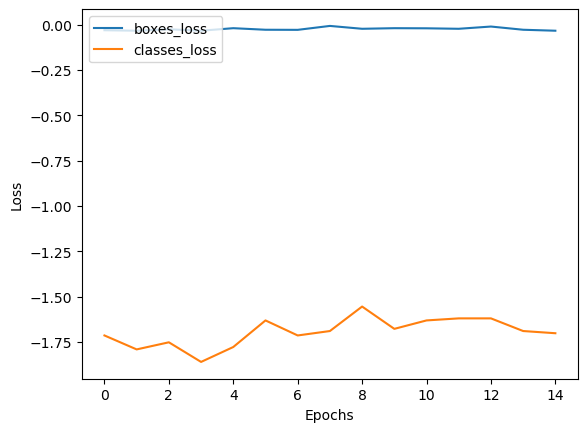

In [275]:

plt.plot(np.log(history.history["accuracy"]), label="boxes_loss")
plt.plot(np.log(history.history["val_accuracy"]), label="classes_loss")
plt.legend(loc="upper left")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# We have aacuracy very high at 0.9663 but val_accuracy is low at 0.1822. This means there is overfitting. But also I trained with only a small amount of picture so
# the model could be not learning enough based on the limited data data I put in. 

In [276]:
from keras.applications.resnet50 import preprocess_input, decode_predictions
from skimage.transform import resize

image = subset_x_test[1]
image - subset_x_test[1]
image_resized = resize(image, (224,224), anti_aliasing=True)*256
image_resized = np.expand_dims(image_resized, 0)
image_resized = preprocess_input(image_resized)

preds = model.predict(image_resized)
print('Predicted:', decode_predictions(preds, top=3)[0])


1/1 [==============================] - 0s 87ms/step
Predicted: [('n07930864', 'cup', 1.0), ('n02317335', 'starfish', 0.0), ('n02391049', 'zebra', 0.0)]


[33]


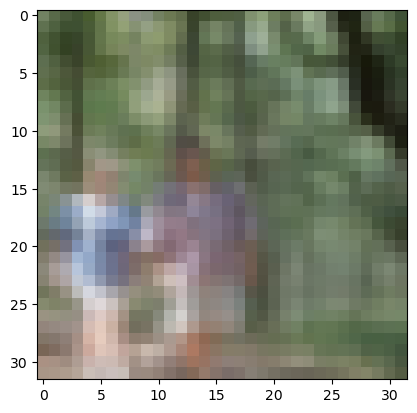

In [282]:
plt.imshow(x_test_org[1])
print(y_test_org[1])

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.